# LAB2 MACHINE LEARNING
KIESGEN DE RICHTER Stanislas, PRECIGOUT Gabriel

We will work on bike rental dataset to predict the bike rental hourly and daily demand according to multiple parameters

# 1: Data preprocessing
First we import libraries and import our data as a single dataframe. 

In [ ]:
#Import and Hyper parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
pd.options.mode.chained_assignment = None  # default='warn'
alpha = 0.03
iter_ = 10000
delta = 0.0000001

In [ ]:
df = pd.read_csv ("data/Bike_Rental_UCI_dataset.csv")
dfuntouched = df
print (df)

       season  yr  mnth  hr  holiday  workingday  weathersit  temp   hum  \
0           1   0     1   0        0           0           1  0.24  0.81   
1           1   0     1   1        0           0           1  0.22  0.80   
2           1   0     1   2        0           0           1  0.22  0.80   
3           1   0     1   3        0           0           1  0.24  0.75   
4           1   0     1   4        0           0           1  0.24  0.75   
...       ...  ..   ...  ..      ...         ...         ...   ...   ...   
17374       1   1    12  19        0           1           2  0.26  0.60   
17375       1   1    12  20        0           1           2  0.26  0.60   
17376       1   1    12  21        0           1           1  0.26  0.60   
17377       1   1    12  22        0           1           1  0.26  0.56   
17378       1   1    12  23        0           1           1  0.26  0.65   

       windspeed dayOfWeek  days  demand  
0         0.0000       Sat     0      16  
1

## 1.1 Explaination of all the features:

* **season**: this feature can have 4 different values and describe the season when the data was gathered:
    - 1: winter season
    - 2: spring season
    - 3: summer season
    - 4: fall season
* **yr**: this feature can have 2 different values 1 or 0, if its 0 it corresponds to the year 2011 otherwise it corresponds to 2012.
* **mnth**: this feature's values goes from 1 to 12 with each number being associated to its month *i.e. January = 1*.
* **hr**: this feature's values goes from 0 to 23 with each number being associated to its hour *i.e. 2 corresponds to 2AM*.
* **holiday**: this feature states if there was an holiday or not for the data, 0 meaning no holiday and 1 correspond to a holiday.
* **workingday**: this feature tells us if it was a working day or not for the data, 0 meaning it was neither a working day or holiday and 1 meaning its a working day without being a holiday.
* **weathersit**: this feature can have 4 different values and describe the type of weather when the data was gathered:
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy.
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist.
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.
* **temp**: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale).
* **hum**: Normalized humidity. The values are divided to 100 (max).
* **windspeed**: Normalized wind speed. The values are divided to 67 (max).
* **dayOfWeek**: name of the day when the data was gathered.
* **days**: cumulative feature inscreasing over time and representing the number total of days passed when the data was gathered.
* **demand**: number of bikes rented when the data was gathered (this include the bikes rented by casual and registered customers).

## 1.2 Correlation matrix without dummies

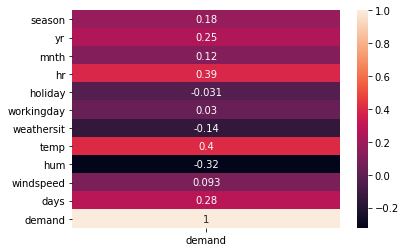

In [ ]:
corrMatrix = df.corr()
corrMatrixdemand= corrMatrix[["demand"]]
sn.heatmap(corrMatrixdemand, annot=True)
plt.show()

The closest our feature is from 0 and the less relevant it is for our study, we can see that the windspeed feature doesn't seem relevant in our dataset.

## 1.3 Creation of cyclic dummy variables (with cos and sin function for the cyclic)

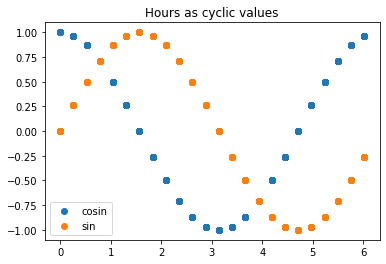

       yr  holiday  workingday  temp   hum  windspeed  days  demand  season_2  \
0       0        0           0  0.24  0.81     0.0000     0      16         0   
1       0        0           0  0.22  0.80     0.0000     0      40         0   
2       0        0           0  0.22  0.80     0.0000     0      32         0   
3       0        0           0  0.24  0.75     0.0000     0      13         0   
4       0        0           0  0.24  0.75     0.0000     0       1         0   
...    ..      ...         ...   ...   ...        ...   ...     ...       ...   
17374   1        0           1  0.26  0.60     0.1642   723     119         0   
17375   1        0           1  0.26  0.60     0.1642   723      89         0   
17376   1        0           1  0.26  0.60     0.1642   724      90         0   
17377   1        0           1  0.26  0.56     0.1343   724      61         0   
17378   1        0           1  0.26  0.65     0.1343   724      49         0   

       season_3  ...  hour_

In [ ]:
dummy = pd.get_dummies(df['season'], prefix='season', drop_first=True) #DropFirst = true
df = pd.concat([df, dummy], axis=1)
df = df.drop(columns=['season'])
dummy = pd.get_dummies(df['mnth'], prefix='month', drop_first=True)
df = pd.concat([df, dummy], axis=1)
df["mnthsin"]=np.sin(2*math.pi* ( (df[["mnth"]].to_numpy())/12) )
df["mnthcos"]=np.cos(2*math.pi* ( (df[["mnth"]].to_numpy())/12) )

dummy = pd.get_dummies(df['dayOfWeek'], drop_first=True)
df = pd.concat([df, dummy], axis=1)
df = df.drop(columns=['dayOfWeek'])

df["hrnorm"]= math.pi*2* ( (df[["hr"]].to_numpy())/24)
df["hrcos"]=np.cos(df[["hrnorm"]].to_numpy())
df["hrsin"]=np.sin(df[["hrnorm"]].to_numpy())

dummy = pd.get_dummies(df['hr'], prefix='hour', drop_first=True)
df = pd.concat([df, dummy], axis=1)

dummy = pd.get_dummies(df['weathersit'], prefix='weathersit', drop_first=True)
df = pd.concat([df, dummy], axis=1)
df = df.drop(columns=['weathersit'])


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df.hrnorm,df.hrcos,label="cosin")
ax1.scatter(df.hrnorm,df.hrsin,label="sin")
plt.legend(loc='lower left')
plt.title("Hours as cyclic values")
plt.show()


df = df.drop(columns=['hr'])
df = df.drop(columns=['mnth'])

print(df)

## 1.4 Preparing our Data before the spliting in train test dataframes

In [ ]:
Xdata=df #Split X Y
Xdata = Xdata.drop(columns=['demand'])
Xdatauntouched= dfuntouched.drop(columns=['demand'])    
print(Xdata.head(100))
Ydata=df[["demand"]]
print(Ydata.head(10))

    yr  holiday  workingday  temp   hum  windspeed  days  season_2  season_3  \
0    0        0           0  0.24  0.81     0.0000     0         0         0   
1    0        0           0  0.22  0.80     0.0000     0         0         0   
2    0        0           0  0.22  0.80     0.0000     0         0         0   
3    0        0           0  0.24  0.75     0.0000     0         0         0   
4    0        0           0  0.24  0.75     0.0000     0         0         0   
..  ..      ...         ...   ...   ...        ...   ...       ...       ...   
95   0        0           1  0.24  0.48     0.2239     3         0         0   
96   0        0           1  0.22  0.47     0.1642     4         0         0   
97   0        0           1  0.20  0.47     0.2239     4         0         0   
98   0        0           1  0.18  0.43     0.1940     4         0         0   
99   0        0           1  0.20  0.40     0.2985     4         0         0   

    season_4  ...  hour_17  hour_18  ho

# 2. Function definition

## 2.1. Zscaling function to scale our features

In [ ]:
def Zscaling(dataframe): #scale our features
    std = dataframe.std(axis = 0)
    mean = dataframe.mean(axis = 0)
    return ((dataframe-mean)/std)

## 2.2. Costfunction to calculate the cost of our model

In [ ]:
def costfunction(Xnew, Ydata, theta): #calculate the cost
    m = len(Ydata)
    result = np.sum(((Xnew.dot(theta) - Ydata) ** 2)/(2 * m))
    return result

## 2.3. Batch Gradiant Descent function

In [ ]:
def batch_gradient_descent(Xdata, Ydata, theta, alpha, iterations, delta): #from scratch gradient descent
 cost_history =[]
 m = len(Ydata)
 
 for iteration in range(iterations):

    #Values predicted at each iteration of the model
    h = Xdata.dot(theta)

    # Difference between predictions and Actual Y
    loss = h - Ydata

    # Gradient Calculation
    gradient = Xdata.T.dot(loss) / m

    # Changing Values of theta using Gradient
    theta = theta - alpha * gradient 

    # New Cost Value added to the cost list
    cost = costfunction(Xdata, Ydata, theta)
    cost_history.append(cost)
    if( (iteration!= 0 and 1-np.abs(cost_history[-1])/np.abs(cost_history[-2]) < delta) or (iteration==iterations-1) ): # If the new cost² is inferrior to a delta % of last cost² or we reach max iteration we print and leave the loop  
      print("done in ")
      print(iteration+1)
      print("previous cost")
      print(cost_history[-2])
      print("last cost")
      print(cost_history[-1])


      break
    if(iteration!=0 and np.abs(cost_history[-1])>np.abs(cost_history[-2] )): # if we go to far we reduce our learning rate alpha
      alpha = alpha/1.5

 return theta, cost_history

## 2.4. Mean Absolute Error function

In [ ]:
def MAE(actual, predicted):
    error = 0.0
    for i in range (len(actual)):
        error += abs(actual[i] - predicted[i])
    return error / float(len(actual))

## 2.5. Root Mean Square Error function

In [ ]:
def RMSE(actual, predicted):
    error =0.0
    for i in range(len(actual)):
        predictionError = predicted[i] - actual[i]
        error += (predictionError ** 2)
    meanError = error / float(len(actual))
    return math.sqrt(meanError)

# 3. Regression

## 3.1. Data Scaling

In [ ]:
Xscaled= Zscaling(Xdata)
print(Xscaled.head(10))

         yr   holiday  workingday      temp       hum  windspeed     days  \
0 -1.005105 -0.172107   -1.466858 -1.334609  0.947345  -1.553844 -1.72961   
1 -1.005105 -0.172107   -1.466858 -1.438475  0.895513  -1.553844 -1.72961   
2 -1.005105 -0.172107   -1.466858 -1.438475  0.895513  -1.553844 -1.72961   
3 -1.005105 -0.172107   -1.466858 -1.334609  0.636351  -1.553844 -1.72961   
4 -1.005105 -0.172107   -1.466858 -1.334609  0.636351  -1.553844 -1.72961   
5 -1.005105 -0.172107   -1.466858 -1.334609  0.636351  -0.821460 -1.72961   
6 -1.005105 -0.172107   -1.466858 -1.438475  0.895513  -1.553844 -1.72961   
7 -1.005105 -0.172107   -1.466858 -1.542341  1.206507  -1.553844 -1.72961   
8 -1.005105 -0.172107   -1.466858 -1.334609  0.636351  -1.553844 -1.72961   
9 -1.005105 -0.172107   -1.466858 -0.919146  0.688184  -1.553844 -1.72961   

   season_2  season_3  season_4  ...   hour_17  hour_18  hour_19  hour_20  \
0 -0.583026 -0.590734 -0.567345  ... -0.209389 -0.20909 -0.20909 -0.20909  

## 3.2. Creation of the offset and spliting our data in test and split data frames

In [ ]:
Xscaled.insert(0,"x0",1)  # add a column of 1 for the offset x0
Xtrain,Xtest,Ytrain,Ytest = train_test_split(Xscaled,Ydata,random_state = 3)
Xtrainun,Xtestun,Ytrainun,Ytestun = train_test_split(Xdatauntouched,Ydata,random_state = 3)
Xtrain=Xtrain.to_numpy()
Xtest=Xtest.to_numpy()
Ytrain=Ytrain.to_numpy()
Ytest=Ytest.to_numpy()
print("Xtrain \n",Xtrain)
print("Ytrain \n",Ytrain)

Xtrain 
 [[ 1.         -1.00510539 -0.17210724 ... -0.59498872 -0.29816884
  -0.01313933]
 [ 1.         -1.00510539 -0.17210724 ...  1.68060743 -0.29816884
  -0.01313933]
 [ 1.         -1.00510539 -0.17210724 ... -0.59498872 -0.29816884
  -0.01313933]
 ...
 [ 1.          0.9948633  -0.17210724 ... -0.59498872 -0.29816884
  -0.01313933]
 [ 1.         -1.00510539 -0.17210724 ...  1.68060743 -0.29816884
  -0.01313933]
 [ 1.         -1.00510539 -0.17210724 ... -0.59498872 -0.29816884
  -0.01313933]]
Ytrain 
 [[ 61]
 [129]
 [227]
 ...
 [108]
 [ 18]
 [408]]


To use an offset we added a column of 1s to our dataset leading to the first index of theta corresponding to the offset x0

## 3.3. Linear Regression Model Training

done in 
1850
previous cost
5198.508275722782
last cost
5198.507756116385
Theta result:
 [[ 1.89620718e+02]
 [ 2.79374530e+01]
 [-4.44690416e+00]
 [ 2.44909577e+00]
 [ 4.39650460e+01]
 [-1.64226881e+01]
 [-4.25847198e+00]
 [ 1.59375765e+01]
 [ 1.44017466e+01]
 [ 1.05716581e+01]
 [ 2.82559174e+01]
 [ 9.78499951e-02]
 [ 1.94475688e+00]
 [ 3.42586071e-01]
 [ 2.99763121e+00]
 [-2.32976366e-01]
 [-5.52488533e+00]
 [ 3.04590523e-01]
 [ 6.81279888e+00]
 [ 2.88717464e-01]
 [-6.73554833e+00]
 [-7.90441757e+00]
 [ 2.56953177e+00]
 [-1.87495119e+00]
 [-1.26730969e+00]
 [ 2.18289340e+00]
 [-3.31597889e+00]
 [-9.19671450e-01]
 [-1.96712021e+00]
 [-3.97404348e-01]
 [ 3.29867047e+01]
 [-3.99314864e+01]
 [-1.78670052e+01]
 [-3.34384490e+00]
 [-6.40785915e+00]
 [-9.51640515e+00]
 [-1.24800687e+01]
 [-1.26787958e+01]
 [-4.70113304e+00]
 [ 1.77297455e+01]
 [ 4.10343271e+01]
 [ 8.39216544e+00]
 [-5.73099284e+00]
 [-4.94086018e+00]
 [ 6.93855205e-01]
 [-2.06524336e+00]
 [-6.07185143e+00]
 [-4.76353560e+00]

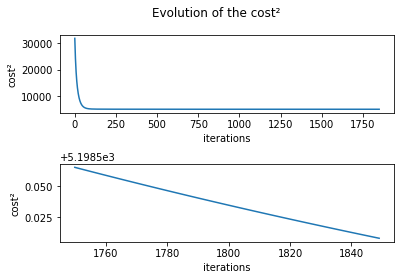

In [ ]:
theta = np.zeros(Xtrain.shape[1]) # we create an array of 0's of the number of features and turn it vertically using np.vstack
theta = np.vstack(theta)

newTheta, cost_history = batch_gradient_descent(Xtrain, Ytrain, theta, alpha, iter_,delta)

print("Theta result:\n",newTheta)
#roundedcostforplot = cost_history.round(decimals=2)

fig, axs = plt.subplots(2)

fig.tight_layout(pad=3.0)
fig.suptitle('Evolution of the cost²')

axs[0].plot(np.arange(len(cost_history)),cost_history)
axs[0].set(xlabel="iterations")
axs[0].set(ylabel="cost²")

axs[1].plot(np.arange(len(cost_history)-100, len(cost_history)  ),cost_history[-100:])
axs[1].set(xlabel="iterations")
axs[1].set(ylabel="cost²")
print("Plot of the entirety of the cost history and last 100 iterations:")

## 3.4. Evaluation and testing of our Model

To evaluate our model we will check the R²  MAE and RMSE 

In [ ]:
def pred(Xdata, theta):

	Yhat=Xdata.dot(theta)

	return Yhat

In [ ]:

Yhat = pred(Xtest,newTheta)
Yhat

array([[188.10555666],
       [359.40983487],
       [229.29487149],
       ...,
       [352.56997091],
       [109.05362968],
       [ 63.60377349]])

### 3.4.1 R2_Score of our model

In [ ]:
def r2(Ytest, Yhat):
 nomi = np.sum((Ytest - Yhat )**2)
 denom = np.sum((Ytest -Ytest.mean() ) **2)
 r2 = 1-  (nomi / denom)
 return(r2)
#----------------

scratR2=r2(Ytest, Yhat)
skR2=r2_score(Ytest,Yhat)
print("our r² caluclation",scratR2)
print("sklearn calculation",skR2)

our r² caluclation 0.6895999085292601
sklearn calculation 0.6895999085292601


### 3.4.2 Mean Absolute Error

In [ ]:
meanAbsoluteError = MAE(Ytest, Yhat)
meanAbsoluteError

array([74.76676532])

### 3.4.3 Root Mean Square Error

In [ ]:
RootMeanSquareError = RMSE(Ytest, Yhat)
RootMeanSquareError

100.84531916258842

# 4: Comparing With Sklearn and Normal Equation

## 4.1 Computation of the Normal Equation

In [ ]:
w = np.linalg.inv(Xtrain.transpose().dot(Xtrain)).dot(Xtrain.transpose()).dot(Ytrain)

## 4.2 Comparison of the R2 score

In [ ]:
skmodel = LinearRegression().fit(Xtrain, Ytrain)
skpredict= skmodel.predict(Xtest)
print("sklearn model score:",r2_score(Ytest, skpredict),"\nOur model score (before change) :",r2_score(Ytest,Yhat),"\nNormal equation score:", float(r2_score(Ytest, Xtest.dot(w))) )
Yhat[Yhat < 0] = 0 # we tweak our results here to not have any negative values which is impossible in our real life case
print("R² score when the negative value predicted are changed to 0 : ",(r2_score(Ytest,Yhat)))

sklearn model score: 0.6898127334746704 
Our model score (before change) : 0.6895999085292601 
Normal equation score: 0.5681515462402394
R² score when the negative value predicted are changed to 0 :  0.7045831834125351


We have a score really close to the sklearn model (<0.0001 difference) , showing that our model is still working as it should like in TP1.

## 4.3 Comparison of the Mean Absolute Error

In [ ]:
skMAE = mean_absolute_error(Ytest, skpredict)
print("sklearn Mean Absolute Variable:",skMAE,"\nOur model MAE:", float(meanAbsoluteError),"\nNormal equation MAE:", float(mean_absolute_error(Ytest, Xtest.dot(w))))

sklearn Mean Absolute Variable: 74.76323771987055 
Our model MAE: 74.7667653164967 
Normal equation MAE: 90.6262697649932


## 4.4 Comparison of the Root Mean Square Error

In [ ]:
skRMSE = mean_squared_error(Ytest, skpredict,squared=False)
print("sklearn Root Mean Square Error:",skRMSE,"\nOur model RSME:", float(RootMeanSquareError),"\nNormal equation RMSE:", float(mean_squared_error(Ytest, Xtest.dot(w), squared=False)))

sklearn Root Mean Square Error: 100.81074108045237 
Our model RSME: 100.84531916258842 
Normal equation RMSE: 118.9489215837696


Our RMSE (unsquared version), MAE and R² are really close to the sklearn model values, meaning that our model is 

## 4.5 Tweaking our Data to improve our Model's score

We first tried to run a model using no dummies except for the day of the week which was obviously qualitative data, we got a score of **0.37606810113007005**.  
To improve that score we decided to add dummies for every non linear values, so for the Seasons, Month, Hours, Weathersit and Day of the Week, we got a score of **0.6896212779178619**.  
We knew about the dropFirst parameter for the get_dummies method that'll drop the first dummy variable for each use of the get_dummies method and we slightly improve our score by **0.00004** , we have **0.6896624840572991**.   
We then tried to use cyclic values using sinuses and cosines for the mounth and hours and got these result :
- **0.6858786863176186** when we only have the mounth as a cylic value and the rest as dummies  
- **0.5021806061547489** with only the hours as cylic; meaning that removing the hours as dummies really makes things worse. 
- **0.6895999085292601** the model improves a bit when we have the values as dummies AND as cyclic.

At the end we discovered that we had some negativ predictions so we replaced these predictions to 0 as we could not have a negative demand in bike in real life, by using this little trick we get a R² score of: **0.7045831834125351**.
We do this change outside of our model, after the preditction so it is not really valid but it improves our results.

We can see in any case that our model is not really effective as a linear regression, we will need to try other models in the part 6.

# 5: Different plots to visualize our results
To visualise our predictions and our data we will use some groupbys:


## 5.1 Preparing our data to plot it

In [ ]:
Dataforplot=Xtestun
Dataforplot.loc[:,"demand"] = Ytestun["demand"].to_numpy()
Dataforplot.loc[:,"predicted"]=Yhat
print(Dataforplot.head(10))

       season  yr  mnth  hr  holiday  workingday  weathersit  temp   hum  \
10148       1   1     3  22        0           0           1  0.44  0.21   
14578       3   1     9  15        0           1           1  0.80  0.59   
3537        2   0     6   7        0           1           2  0.70  0.79   
3941        2   0     6   3        0           0           1  0.60  0.88   
15165       4   1     9   2        0           0           2  0.54  0.56   
4277        3   0     7   3        0           0           1  0.64  0.53   
7494        4   0    11  21        0           0           1  0.48  0.36   
11889       2   1     5  14        0           1           2  0.64  0.73   
4319        3   0     7  21        0           0           2  0.66  0.83   
11032       2   1     4  20        0           1           1  0.50  0.36   

       windspeed dayOfWeek  days  demand   predicted  
10148     0.1343       Sat   422     134  188.105557  
14578     0.4627       Tue   607     292  359.409835 

## 5.2 Group by Hourly Actual Demand VS Hourly Prediction

Standart deviation: demand       130.882984
predicted    123.673079
dtype: float64


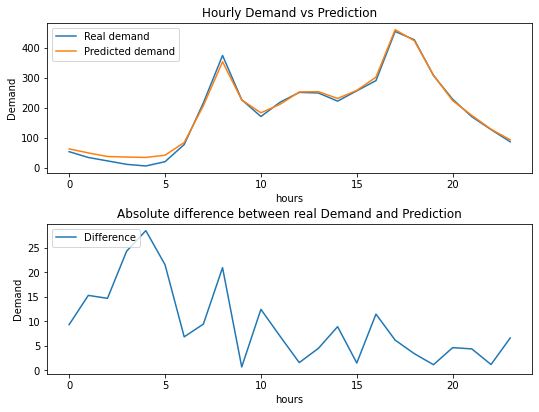

In [ ]:
Group_by_hour = Dataforplot[["hr","demand","predicted"]]   #get the data of the hour only
Group_by_hour = Group_by_hour.groupby(["hr"]).mean()
print("Standart deviation:", Group_by_hour.std())

Group_by_hour["dif"]= np.abs(Group_by_hour[["demand"]].to_numpy() - Group_by_hour[["predicted"]].to_numpy() )

fig_hour, (ax1, ax2) = plt.subplots(2,figsize=(8, 6))
fig_hour.tight_layout(pad=3.0)

ax1.set_title("Hourly Demand vs Prediction")

ax1.plot(Group_by_hour.index,Group_by_hour.demand,label="Real demand")
ax1.plot(Group_by_hour.index,Group_by_hour.predicted,label="Predicted demand")
ax1.set_xlabel("hours")
ax1.set_ylabel("Demand")
ax1.legend(loc='upper left')


ax2.set_title("Absolute difference between real Demand and Prediction")
ax2.plot(Group_by_hour.index,Group_by_hour.dif,label="Difference")
ax2.set_xlabel("hours")
ax2.set_ylabel("Demand")
ax2.legend(loc='upper left')

plt.show()


From this graph we can see that our average prediction is actually quite close to the real avaerage values but the standart deviation of both is so huge that it is not really precise anyway.

## 5.3 Group by Seasonly Actual Demand VS Seasonly Prediction

Standart deviation: demand       54.508106
predicted    46.774951
dtype: float64


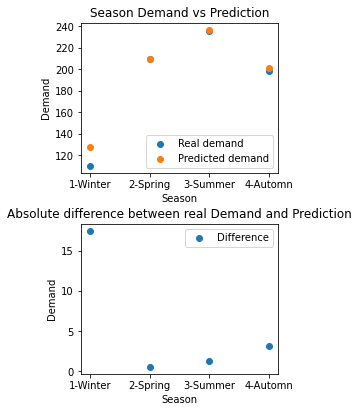

              demand   predicted        dif
season                                     
1-Winter  109.924038  127.457480  17.533442
2-Spring  209.124183  209.670636   0.546453
3-Summer  235.563356  236.815797   1.252440
4-Automn  198.455910  201.555299   3.099389


In [ ]:
Group_by_season = Dataforplot[["season","demand","predicted"]]   #get the data of the hour only

Group_by_season["season"] = Group_by_season["season"].replace({1: "1-Winter", 2: "2-Spring" , 3:"3-Summer",4 : "4-Automn" }) 
Group_by_season = Group_by_season.groupby(["season"]).mean()
print("Standart deviation:", Group_by_season.std())

Group_by_season["dif"]= np.abs(Group_by_season[["demand"]].to_numpy() - Group_by_season[["predicted"]].to_numpy() )

fig_season, (ax1, ax2) = plt.subplots(2,figsize=(4, 6))
fig_season.tight_layout(pad=3.0)

ax1.set_title("Season Demand vs Prediction")

ax1.scatter(Group_by_season.index,Group_by_season.demand,label="Real demand")
ax1.scatter(Group_by_season.index,Group_by_season.predicted,label="Predicted demand")
ax1.set_xlabel("Season")
ax1.set_ylabel("Demand")
ax1.legend(loc='lower right')


ax2.set_title("Absolute difference between real Demand and Prediction")
ax2.scatter(Group_by_season.index,Group_by_season.dif,label="Difference")
ax2.set_xlabel("Season")
ax2.set_ylabel("Demand")
ax2.legend(loc='upper right')

plt.show()

print(Group_by_season)


We can see that their is a really low demand for bike in winter, around 110 but the other season are quite close from each other and all around 220 with <15% difference beetween them

## 5.4 Group by Effect of Temperature on Actual Demand VS Prediction

Standart deviation: demand       130.882984
predicted    123.673079
dif            7.857986
dtype: float64


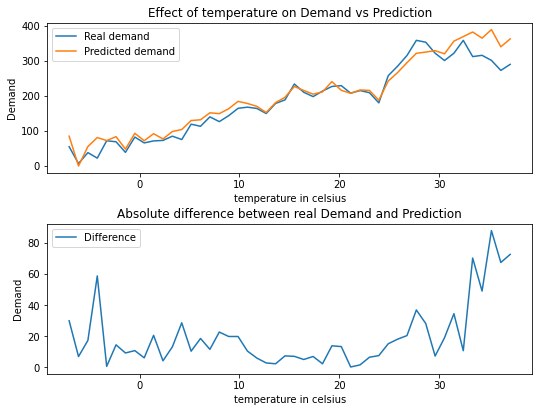

In [ ]:


Group_by_temp = Dataforplot[["temp","demand","predicted"]]   #get the data of the hour only
Group_by_temp["temp"]=Group_by_temp[["temp"]].to_numpy()*47-8 # get the real temperature (unNormalise)
Group_by_temp = Group_by_temp.groupby(["temp"]).mean()
print("Standart deviation:", Group_by_hour.std())

Group_by_temp["dif"]= np.abs(Group_by_temp[["demand"]].to_numpy() - Group_by_temp[["predicted"]].to_numpy() )

fig_hour, (ax1, ax2) = plt.subplots(2,figsize=(8, 6))
fig_hour.tight_layout(pad=3.0)

ax1.set_title("Effect of temperature on Demand vs Prediction")

ax1.plot(Group_by_temp.index,Group_by_temp.demand,label="Real demand")
ax1.plot(Group_by_temp.index,Group_by_temp.predicted,label="Predicted demand")
ax1.set_xlabel("temperature in celsius")
ax1.set_ylabel("Demand")
ax1.legend(loc='upper left')


ax2.set_title("Absolute difference between real Demand and Prediction")
ax2.plot(Group_by_temp.index,Group_by_temp.dif,label="Difference")
ax2.set_xlabel("temperature in celsius")
ax2.set_ylabel("Demand")
ax2.legend(loc='upper left')

plt.show()


Our Prediction is pretty close to the actual demand exept for -7° where our prediction is -100 rented bike, we could fix it by setting all the negative values of our prediction to zero.
We can see that the higher the temperature is and the higher the number of rented bikes will be, until 30ish degree Celsius where it'll go down.
The highest number of customers is between 24° and 28° which makes sense because it's a warm temperature and optimal to do some outside exercise or to commute to work on a bike.

## 5.4 Group by Daily Actual Demand VS Daily Prediction

Standart deviation: demand       12.064756
predicted     9.594069
dtype: float64


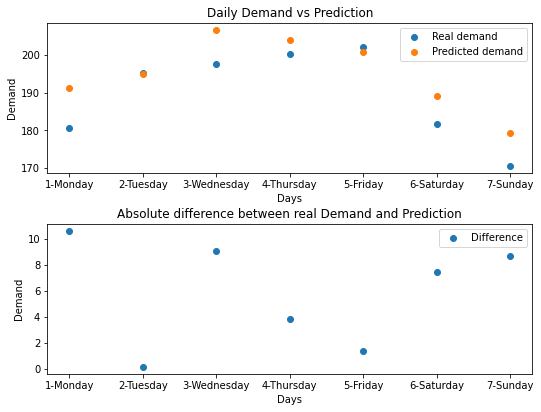

                 demand   predicted        dif
dayOfWeek                                     
1-Monday     180.730183  191.342358  10.612175
2-Tuesday    195.195082  195.070368   0.124714
3-Wednesday  197.723856  206.765639   9.041783
4-Thursday   200.211200  203.994899   3.783699
5-Friday     202.244094  200.905057   1.339037
6-Saturday   181.731079  189.133127   7.402048
7-Sunday     170.542662  179.171592   8.628930


In [ ]:
Group_by_daily = Dataforplot[["dayOfWeek","demand","predicted"]]   #get the data of the days of the week only only

Group_by_daily["dayOfWeek"] = Group_by_daily["dayOfWeek"].replace({"Mon": "1-Monday", "Tue": "2-Tuesday" , "Wed":"3-Wednesday","Thr":"4-Thursday","Fri": "5-Friday" , "Sat":"6-Saturday","Sun":"7-Sunday" }) 
Group_by_daily = Group_by_daily.groupby(["dayOfWeek"]).mean()
print("Standart deviation:", Group_by_daily.std())

Group_by_daily["dif"]= np.abs(Group_by_daily[["demand"]].to_numpy() - Group_by_daily[["predicted"]].to_numpy() )

fig_daily, (ax1, ax2) = plt.subplots(2,figsize=(8, 6))
fig_daily.tight_layout(pad=3.0)

ax1.set_title("Daily Demand vs Prediction")

ax1.scatter(Group_by_daily.index,Group_by_daily.demand,label="Real demand")
ax1.scatter(Group_by_daily.index,Group_by_daily.predicted,label="Predicted demand")
ax1.set_xlabel("Days")
ax1.set_ylabel("Demand")
ax1.legend(loc='upper right')


ax2.set_title("Absolute difference between real Demand and Prediction")
ax2.scatter(Group_by_daily.index,Group_by_daily.dif,label="Difference")
ax2.set_xlabel("Days")
ax2.set_ylabel("Demand")
ax2.legend(loc='upper right')

plt.show()

print(Group_by_daily)

From this plot we can see that people tend to take a bike a bit less on sunday. We can also see that our predictions are actually quite good compared to the real data with only a difference of 10 at most. 

# 6. Other Implementation of Regression Models

## 6.1 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

param_dist = {"max_depth": [14, None],
              "max_features": randint(1, 20),
              "min_samples_leaf": randint(1, 20)} #we have a min depth of 11 if the value is lower the max_depth will switch to None
# After some tweakings with the max_depth in the line above we reach the conclusion that 14 is the most optimal value
reg = DecisionTreeRegressor(random_state=0) 
tree_cv = RandomizedSearchCV(reg, param_dist, cv= 30)
tree_cv.fit(Xtrain, Ytrain)

Yhat = tree_cv.predict(Xtest)
np.set_printoptions(precision=2)
print(np.concatenate((Yhat.reshape(len(Yhat),1), Ytest.reshape(len(Ytest),1)),1))
r2_score(Ytest, Yhat)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

[[ 94.38 134.  ]
 [283.29 292.  ]
 [278.33 284.  ]
 ...
 [628.89 620.  ]
 [ 55.89  48.  ]
 [  3.5    2.  ]]
Tuned Decision Tree Parameters: {'max_depth': None, 'max_features': 17, 'min_samples_leaf': 6}
Best score is 0.8866598278957887


We have a score of 0.9032144237162132 for the Decision Tree with **the best HyperParameters** we found (max_depth = 14, cv = 30).

## 6.2 Linear Support Vector Regression

In [ ]:
from sklearn.svm import LinearSVR

reg = LinearSVR()
reg.fit(Xtrain, np.ravel(Ytrain))

Yhat = reg.predict(Xtest)
np.set_printoptions(precision=2)
print(np.concatenate((Yhat.reshape(len(Yhat),1), Ytest.reshape(len(Ytest),1)),1))
r2_score(Ytest, Yhat)

[[176.19 134.  ]
 [284.65 292.  ]
 [237.31 284.  ]
 ...
 [289.83 620.  ]
 [ 89.23  48.  ]
 [ 43.72   2.  ]]


0.6663090531040543

We have a score of 0.6660469222621999 for the Linear Support Vector Regression

## 6.3 Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(Xtrain)
reg = LinearRegression()
reg.fit(X_poly, Ytrain)

# predicting
Yhat = reg.predict(poly_reg.transform(Xtest))
np.set_printoptions(precision=2)
print(np.concatenate((Yhat.reshape(len(Yhat),1), Ytest.reshape(len(Ytest),1)),1))
r2_score(Ytest, Yhat)

[[134.34 134.  ]
 [331.98 292.  ]
 [282.36 284.  ]
 ...
 [577.69 620.  ]
 [ 10.    48.  ]
 [-16.5    2.  ]]


0.9206033144541242

We have a score of 0.9206033144541242 for the Polynomial Regression. 
We notice that the Polynomial Regression is taking more time than the other algorithms.

## 6.4 Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=100, random_state=0)
reg.fit(Xtrain, np.ravel(Ytrain))

Yhat = reg.predict(Xtest)
np.set_printoptions(precision=2)
print(np.concatenate((Yhat.reshape(len(Yhat),1), Ytest.reshape(len(Ytest),1)),1))
r2_score(Ytest, Yhat)


[[126.49 134.  ]
 [310.78 292.  ]
 [289.34 284.  ]
 ...
 [667.85 620.  ]
 [ 62.24  48.  ]
 [  5.82   2.  ]]


0.9433616179563185

We have a score of 0.9433616179563185 for the Random Forest Regressor which seems to be the best fitted Algorithm for our Dataset.

# Conclusion

Here's a list of the different algorithm ranked from the worst to the best one according to their respective score:
- 6th: **0.6662382656096661** for the Linear Support Vector Regression.
- 5th: **0.6895999085292601** for the Linear Regression.
- 4th: **0.7045831834125351** for Linear Regression with negatives predictions set to 0 afterward
- 3rd: **0.9032144237162132** for the Decision Tree.
- 2nd: **0.9206033144541242** for the Polynomial Regression.
- 1st: **0.9433616179563185** for the Random Forest Regression.

We can see that the best algorithm is the Random Forest Regression because it is the model that's the best fitted for our Dataset with a lot of qualitative data and intervals as it combine multiple regression trees which is the best basic model. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7ed6b7ae-2406-4749-b23e-cd3909d8f028' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>